Задание по Теме 4 

Dataset “Doctor.xlsx” (переменные Y=исход беременности (зависимая переменная), x1, x2, x3, x4, x5 (независимые переменные, факторы)=показатели исследуемой женщины): 

Построить описательную статистику с помощью функции summary. 

При необходимости создать категориальную переменную (функция factor). 

Построить базовую модель логистической регрессии с максимально возможным количеством предикторов с использованием функции glm.  

Записать уравнение бинарной регрессии, используя оценки коэффициентов. 

Протестировать значимость коэффициентов регрессии в отдельности.  

Проверить значимость регрессии в целом по критерию Вальда и максимального правдоподобия. 

Построить доверительные интервалы для коэффициентов регрессии (функции  confint и confint.default). 

Провести сравнительный анализ логит и пробит моделей. 

Построить таблицу сопряженности с пороговой вероятностью 0.5 (функция  confusionMatrix). 

Посчитать специфичность и чувствительность модели (функции  sensitivity и specificity). 

Найти оптимальное пороговое значение вероятности предсказания. Построить таблицу сопряженности для этой вероятности, посчитать специфичность и чувствительность модели (функция  optimalCutoff). 

Если выборка большого объема, то можно предварительно разбить выборку на две части: тренировочная и тестовая выборки (функция  sample_frac). 

Построить ROC кривую, интерпретировать результаты (функция  plotROC).  

Попробовать улучшить логит или пробит модель с использованием коэффициента AIC (функция  stepAIC). 

 

 

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
file_path = 'D:\python\matstat\me\lab_5\Doctor.xlsx'
data = pd.read_excel(file_path)
data.head()

,y,x1,x2,x3,x4,x5
0,0,14,4.30,1.00,2,3.72
1,0,12,11.54,8.49,3,40.28
2,0,14,5.84,2.47,3,56.00
3,1,11,14.70,6.60,1,57.41
4,0,21,5.10,3.48,1,83.00


Описательная статистика

In [7]:
descriptive_stats = data.describe()
descriptive_stats

,y,x1,x2,x3,x4,x5
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.637931,16.327586,10.327931,7.141379,2.344828,45.135000
std,0.484796,3.213939,3.957742,3.749343,0.928151,53.956171
min,0.000000,11.000000,3.300000,1.000000,1.000000,0.800000
25%,0.000000,14.000000,6.375000,3.985000,1.000000,22.115000
50%,1.000000,16.000000,10.450000,6.835000,3.000000,38.935000
75%,1.000000,19.000000,13.400000,9.975000,3.000000,53.125000
max,1.000000,27.000000,19.000000,16.000000,3.000000,399.800000


In [9]:
data['y'] = data['y'].astype('category')
data.head()

,y,x1,x2,x3,x4,x5
0,0,14,4.30,1.00,2,3.72
1,0,12,11.54,8.49,3,40.28
2,0,14,5.84,2.47,3,56.00
3,1,11,14.70,6.60,1,57.41
4,0,21,5.10,3.48,1,83.00


In [ ]:
X = data[['x1', 'x2', 'x3', 'x4', 'x5']]
X = sm.add_constant(X)
Y = data['y'].astype('int')

Базовая модель логистической регрессии

In [11]:
logit_model = sm.Logit(Y, X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.341788
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.4779
Time:                        14:46:11   Log-Likelihood:                -19.824
converged:                       True   LL-Null:                       -37.967
Covariance Type:            nonrobust   LLR p-value:                 8.325e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.9423      3.871     -2.827      0.005     -18.529      -3.356
x1             0.4555      0.180      2.529      0.011       0.102       0.809
x2             0.8085      0.436      1.855      0.064      -0.046       1.663
x3            -0.3559      0.418     -0.852      0.394      -1.175       0.463
x4             0.1262      0.422      0.299      0.765      -0.701       0.954
x5            -0.0319      0.020     -1.605      0.109      -0.071       0.007
==============================================================================
"""

Запись уравнения регрессии

In [16]:
coefficients = logit_model.params
print("Уравнение регрессии (logit):")
equation_logit = "y = 1 / (1 + exp(-({:.4f} + {:.4f}*x1 + {:.4f}*x2 + {:.4f}*x3 + {:.4f}*x4 + {:.4f}*x5))".format(
    coefficients.iloc[0], coefficients.iloc[1], coefficients.iloc[2], coefficients.iloc[3], coefficients.iloc[4], coefficients.iloc[5]
)

equation_logit



Уравнение регрессии (logit):


'y = 1 / (1 + exp(-(-10.9423 + 0.4555*x1 + 0.8085*x2 + -0.3559*x3 + 0.1262*x4 + -0.0319*x5))'

значимость коэффициентов регрессии

In [17]:
print("Значимость коэффициентов:")
logit_model.pvalues

Значимость коэффициентов:


const    0.004699
x1       0.011451
x2       0.063629
x3       0.394305
x4       0.765029
x5       0.108591
dtype: float64

Проверка значимости регрессии в целом по критерию Вальда


In [18]:
# Проверка значимости регрессии в целом по критерию Вальда
wald_stat = logit_model.llr
wald_pvalue = logit_model.llr_pvalue
print(f"Критерий Вальда: {wald_stat}, p-value: {wald_pvalue}")

Критерий Вальда: 36.28609303282266, p-value: 8.32515761810171e-07


Значимость регрессии с помощью метода максимального правдоподобия

In [ ]:
llf_null = logit_model.llnull  # Логарифм правдоподобия нулевой модели
llf_model = logit_model.llf    # Логарифм правдоподобия полной модели

chi_square_stat = -2 * (llf_null - llf_model)

df_difference = logit_model.df_model
p_value_likelihood = stats.chi2.sf(chi_square_stat, df_difference)

print(f"Критерий максимального правдоподобия (логарифмы):")
print(f"Логарифм правдоподобия нулевой модели: {llf_null:.4f}")
print(f"Логарифм правдоподобия полной модели: {llf_model:.4f}")
print(f"Статистика хи-квадрат = {chi_square_stat:.4f}")
print(f"Количество степеней свободы = {df_difference}")
print(f"p-value = {p_value_likelihood:.16f}")

# Интерпретация результата
if p_value_likelihood < 0.05:
    print("Полная модель значимо лучше нулевой модели (на уровне значимости 0.05).")
else:
    print("Полная модель не имеет значимых улучшений по сравнению с нулевой моделью.")


Критерий максимального правдоподобия (логарифмы):
Логарифм правдоподобия нулевой модели: -37.9668
Логарифм правдоподобия полной модели: -19.8237
Статистика хи-квадрат = 36.2861
Количество степеней свободы = 5.0
p-value = 0.0000008325157618
Полная модель значимо лучше нулевой модели (на уровне значимости 0.05).


Доверительные интервалы для коэффициентов

In [22]:
conf_intervals = logit_model.conf_int()
print("Доверительные интервалы:")
conf_intervals

Доверительные интервалы:


,0,1
const,-18.528639,-3.355914
x1,0.102432,0.808508
x2,-0.045854,1.662881
x3,-1.174720,0.462956
x4,-0.701351,0.953744
x5,-0.070765,0.007056


Сравнение логит и пробит моделей

In [23]:
probit_model = sm.Probit(Y, X).fit()
coefficients_probit = probit_model.params
print(probit_model.summary())
print("Уравнение регрессии (probit):")
equation_probit = "y = Φ({:.4f} + {:.4f}*x1 + {:.4f}*x2 + {:.4f}*x3 + {:.4f}*x4 + {:.4f}*x5)".format(
    coefficients_probit.iloc[0], coefficients_probit.iloc[1], coefficients_probit.iloc[2],
    coefficients_probit.iloc[3], coefficients_probit.iloc[4], coefficients_probit.iloc[5]
)
print(equation_probit)
print("AIC Logit модели:", logit_model.aic)
print("AIC Probit модели:", probit_model.aic)


Optimization terminated successfully.
         Current function value: 0.342187
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                   58
Model:                         Probit   Df Residuals:                       52
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.4773
Time:                        15:17:56   Log-Likelihood:                -19.847
converged:                       True   LL-Null:                       -37.967
Covariance Type:            nonrobust   LLR p-value:                 8.504e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2387      2.132     -2.926      0.003     -10.418      -2.060
x1             0.2601      0.

Построение таблицы сопряженности с порогом 0.5

In [29]:
y_pred = logit_model.predict(X)
y_pred_class = (y_pred >= 0.5).astype(int)
conf_matrix = confusion_matrix(Y, y_pred_class)
print("Таблица сопряженности при пороге 0.5:")
conf_matrix

Таблица сопряженности при пороге 0.5:


array([[18,  3],
       [ 3, 34]], dtype=int64)

Чувствительность и специфичность


In [25]:
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print(f"Чувствительность: {sensitivity:.4f}, Специфичность: {specificity:.4f}")


Чувствительность: 0.9189, Специфичность: 0.8571


Оптимальное пороговое значение и чувствительность и специфичность при оптимальном пороге

In [27]:

fpr, tpr, thresholds = roc_curve(Y, y_pred)
you_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[you_index]
print(f"Оптимальный порог: {optimal_threshold:.4f}")

y_pred_class_optimal = (y_pred >= optimal_threshold).astype(int)
conf_matrix_optimal = confusion_matrix(Y, y_pred_class_optimal)
print("Таблица сопряженности при оптимальном пороге:")
print(conf_matrix_optimal)

TN, FP, FN, TP = conf_matrix_optimal.ravel()
sensitivity_optimal = TP / (TP + FN)
specificity_optimal = TN / (TN + FP)
print(f"Чувствительность при оптимальном пороге: {sensitivity_optimal:.4f}, Специфичность: {specificity_optimal:.4f}")


Оптимальный порог: 0.5376
Таблица сопряженности при оптимальном пороге:
[[18  3]
 [ 3 34]]
Чувствительность при оптимальном пороге: 0.9189, Специфичность: 0.8571


Разделение данных на тренировочную и тестовую выборки

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
logit_model_train = sm.Logit(Y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.307286
         Iterations 8


 ROC-кривая


AUC: 0.7922


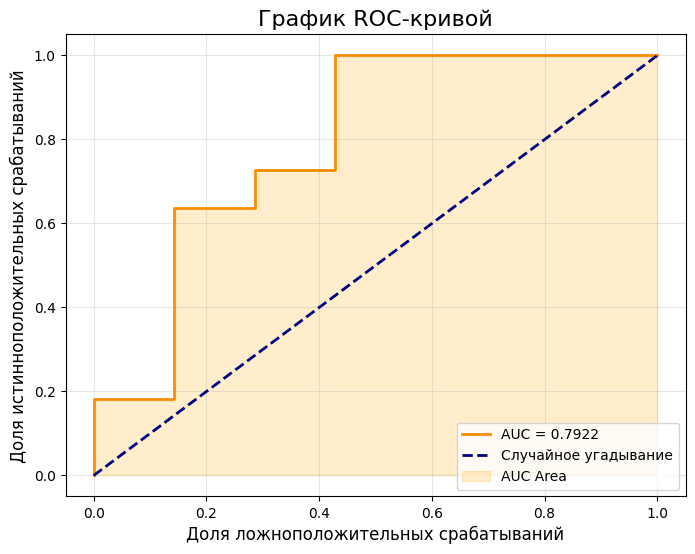

In [35]:
y_test_pred = logit_model_train.predict(X_test)
roc_auc = roc_auc_score(Y_test, y_test_pred)
print(f"AUC: {roc_auc:.4f}")

false_positive_rate, true_positive_rate, _ = roc_curve(Y_test, y_test_pred)


plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', linewidth=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2, label='Случайное угадывание')
plt.fill_between(false_positive_rate, 0, true_positive_rate, color='orange', alpha=0.2, label='AUC Area')

# Настройки графика
plt.title('График ROC-кривой', fontsize=16)
plt.xlabel('Доля ложноположительных срабатываний', fontsize=12)
plt.ylabel('Доля истинноположительных срабатываний', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

# Отображение графика
plt.show()

Улучшение модели с помощью уменьшения AIC

In [36]:
logit_model_aic = sm.Logit(Y_train, X_train).fit(method='bfgs', maxiter=200)
print("AIC улучшенной модели:", logit_model_aic.aic)
print(logit_model_aic.summary())

Optimization terminated successfully.
         Current function value: 0.307286
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
AIC улучшенной модели: 36.58288692742908
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   40
Model:                          Logit   Df Residuals:                       34
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.5254
Time:                        15:31:50   Log-Likelihood:                -12.291
converged:                       True   LL-Null:                       -25.898
Covariance Type:            nonrobust   LLR p-value:                 5.185e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------